# Predicting using Unsupervised Learning


### Author-Lolitha Sherley



In [14]:
#Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

%matplotlib inline
import numpy as np
import pandas as pd

### Importing Dataset

In [15]:
iris=pd.read_csv('D:/DAta science/Dataset/iris.csv')
print("Data Imported Successfully")


Data Imported Successfully


### Summary Statistic

In [16]:
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
Iris=iris.drop('Id', axis=1)
print("After removing Id column:")
print(Iris.head())


After removing Id column:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [18]:
Iris.shape

(150, 5)

In [19]:
Iris.isnull().values.any()

False

#There are no null values in the dataset. Let's plot a pairplot to visualise all the attributes dependency on each other.

In [20]:
Iris['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

Text(0.5, 1.0, 'No of species')

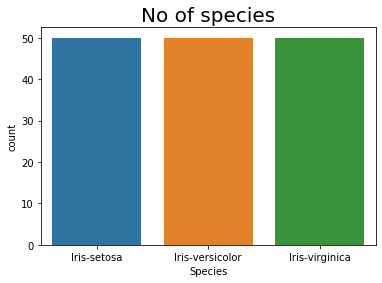

In [21]:
sns.countplot(x='Species',data=Iris)
plt.title("No of species", fontsize =20)

### EDA
Pairplot Visualization

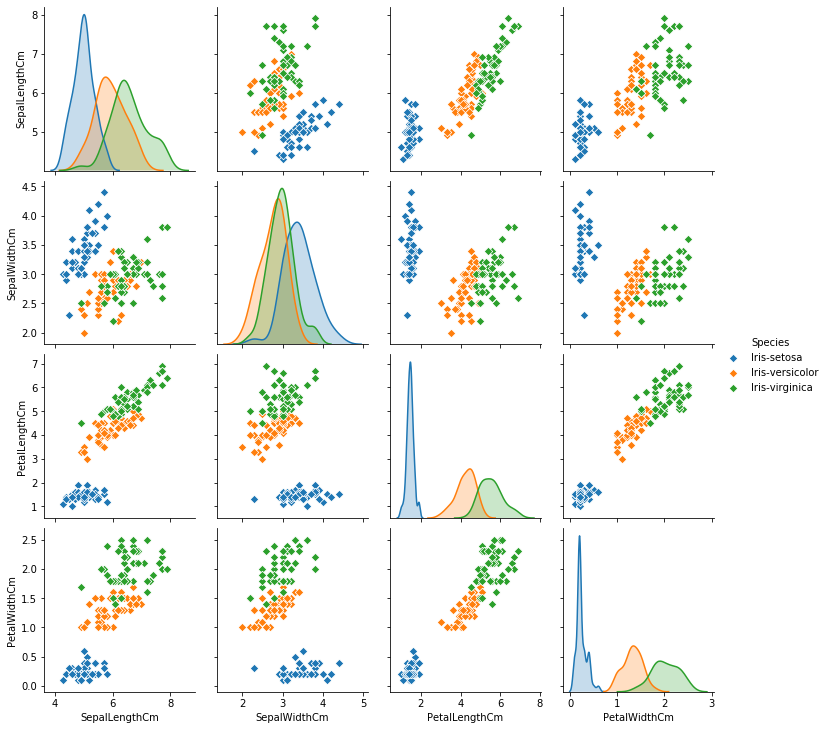

In [22]:

sns.pairplot(Iris,hue='Species',markers='D')
plt.show()



###### We can easily observe that "iris- setosa makea a distinctive cluster in every parameter,while the other two pieces are overlapping on each other. We can determine the optimum number of cluster using elbow method

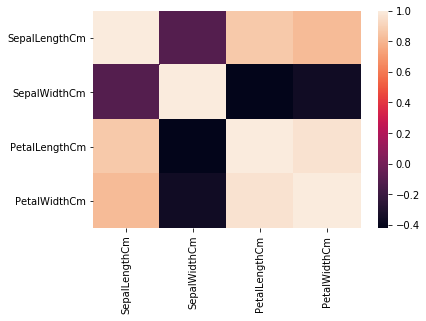

In [23]:
sns.heatmap(Iris.corr())

In [38]:
p=iris.iloc[:,[0,1,2,3,4]].values

##### Optimum number of clusters for k-means classification

In [39]:
from sklearn.cluster import KMeans

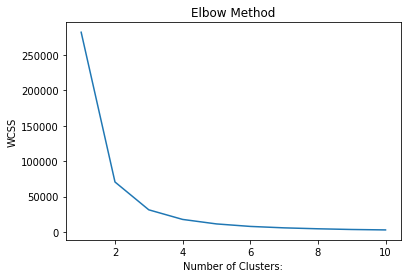

In [40]:
wcss= []
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(p)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel("Number of Clusters:")
plt.ylabel('WCSS')
plt.show()

We can clearly see why it is called "the elbow method" from the above graph, theoptium clusters is where the elbow occurs. Thsi is when the
within cluster sum of squares(WCSS) doesn't decrease significantly with every iteration.IN the above graph,it is there is no bend after 3.
Hence take number od cluster is 3.

###### Length and width varying according to the species

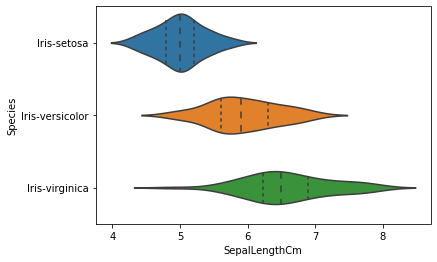

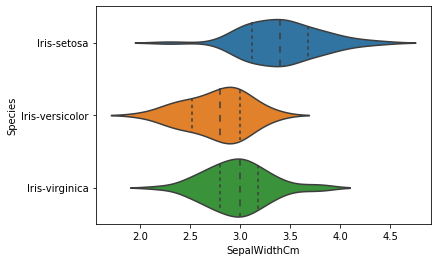

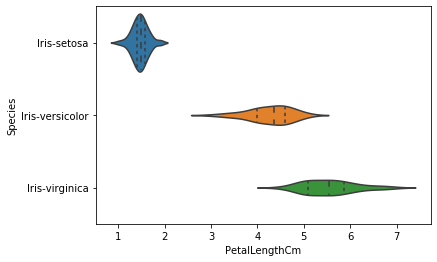

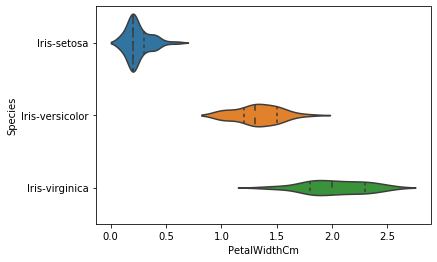

In [41]:
g= sns.violinplot(y='Species',x='SepalLengthCm',data=Iris,inner='quartile')
plt.show()
g=sns.violinplot(y='Species',x='SepalWidthCm',data=Iris,inner='quartile')
plt.show()
g=sns.violinplot(y='Species',x='PetalLengthCm',data=Iris,inner='quartile')
plt.show()
g=sns.violinplot(y='Species',x='PetalWidthCm',data=Iris,inner='quartile')
plt.show()

##### Applying k-means to the dataset

In [45]:
#Applying kmeans to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(p)
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

###### Visualising the clusters- On the first two columns and plotting the centroids of the clusters

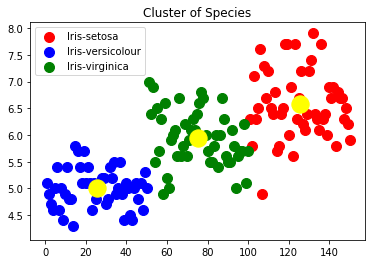

In [46]:
plt.scatter(p[pred_y==0,0],p[pred_y==0,1],s=100,c='red', label='Iris-setosa')
plt.scatter(p[pred_y==1,0],p[pred_y==1,1],s=100,c='blue',label='Iris-versicolour')
plt.scatter(p[pred_y==2,0],p[pred_y==2,1],s=100,c='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow')
plt.title("Cluster of Species")
plt.legend()
plt.show()

In [50]:
KModel=kmeans.fit(p)
KModel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [51]:
KModel.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
KModel.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552,   2.026],
       [ 25.5  ,   5.006,   3.418,   1.464,   0.244],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326]])